In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
df = pd.read_csv("train.csv")

In [116]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [117]:
df.shape

(891, 12)

In [118]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [119]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [120]:
df.isna().sum()
# Not removing the na values as it's only for Age and Cabin details. Won't affect most analysis

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [121]:
df.isnull().sum()
# Not removing the null values as it's only for Age and Cabin details. Won't affect most analysis

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [122]:
# number of passengers

df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [123]:
# How many passengers survived?

(df["Survived"]==1).sum() # using sum instead of count because count will show True and False for all lines. Sum adds up all the 1s

342

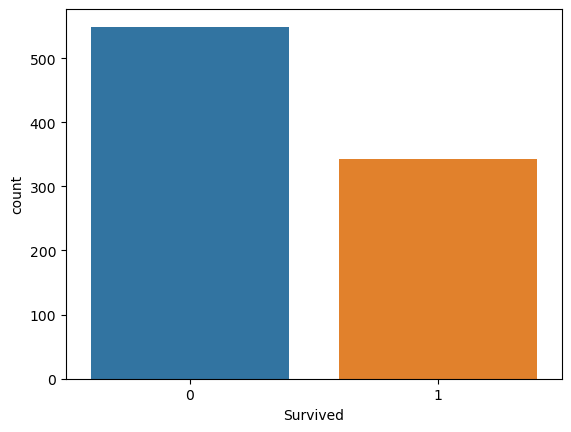

In [124]:
# countplot of passengers who didnt survive vs those who died
sns.countplot(x=df["Survived"])
plt.show()

# More people died than survived

In [125]:
# group survivors by "Survived" and "Sex"

df.groupby(["Survived", "Sex"])["Survived"].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

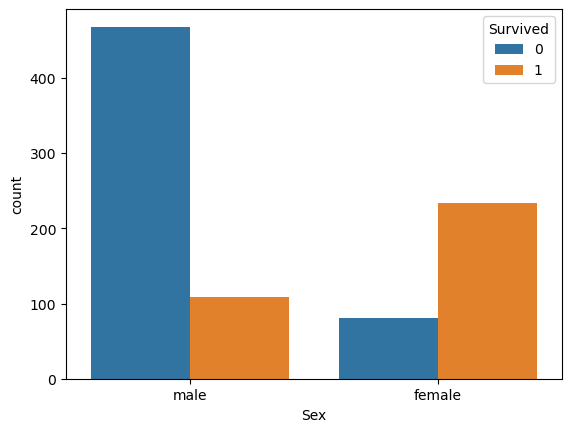

In [126]:
# countplot of gender of passengers who didnt survive vs those who died

sns.countplot(x="Sex", hue="Survived", data=df)
plt.show()

# More females survived vs males

In [127]:
# Of the passengers who survived, what cabin class did they belong to?

df_survived = df[df["Survived"]==1]
df_survived["Pclass"].value_counts()

1    136
3    119
2     87
Name: Pclass, dtype: int64

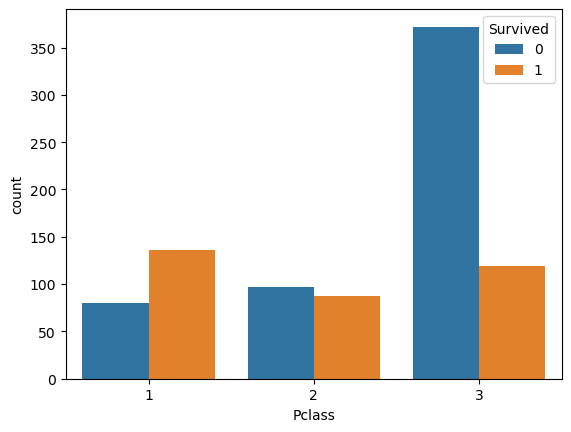

In [131]:
# countplot of survived vs dead based on cabin class
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.show()

# more people in 3rd class died vs people in 1st class. Also highest number of survivors came from 1st class. Due to location of cabins or preferential treatment?

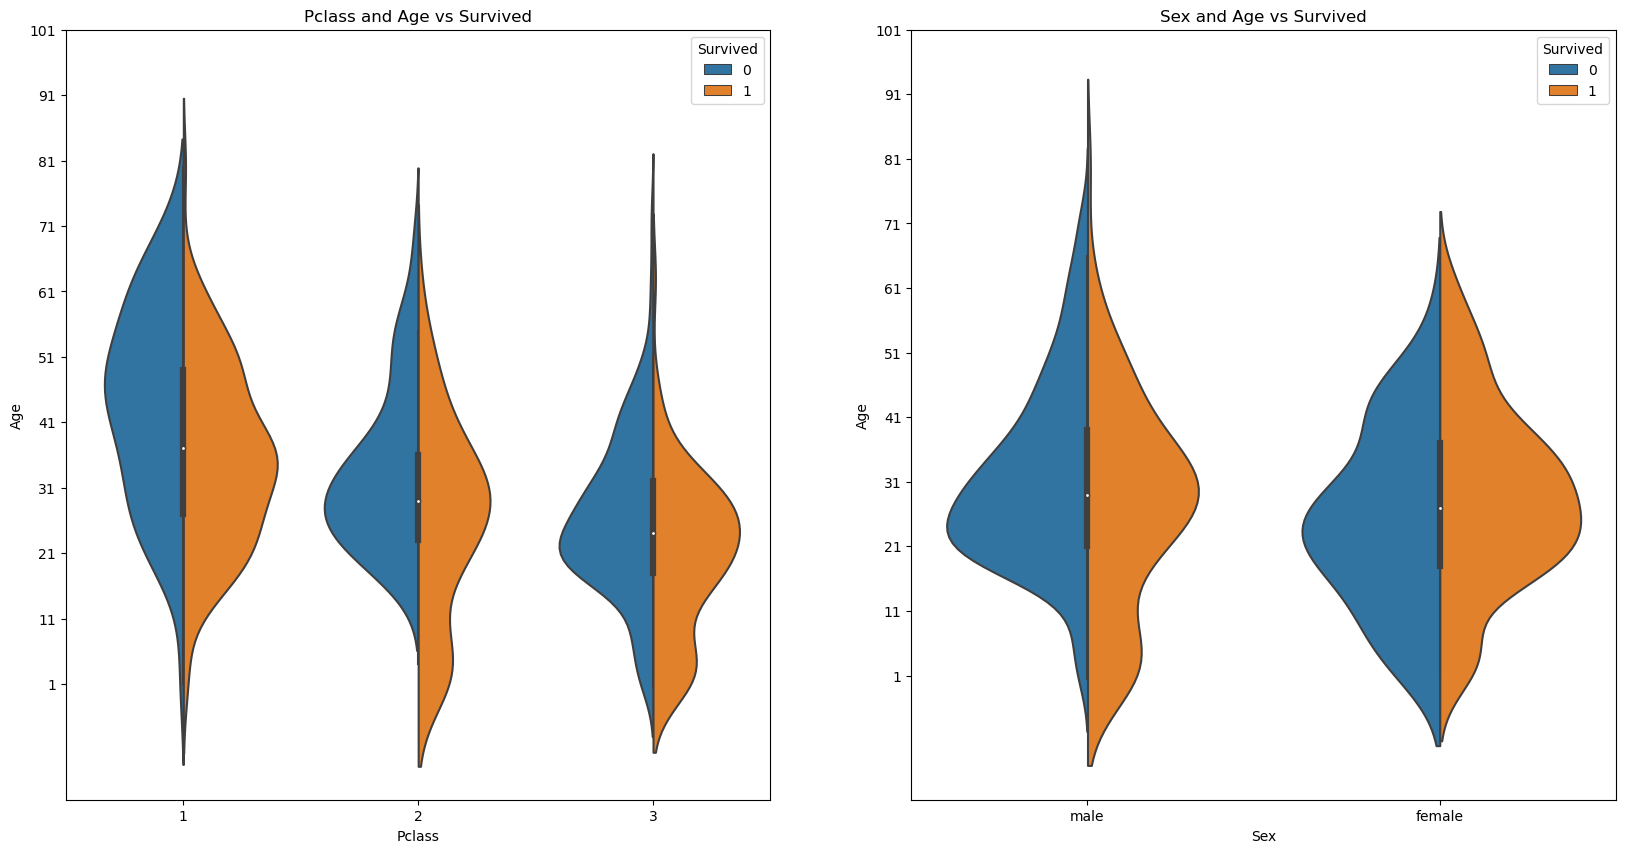

In [163]:
f, ax = plt.subplots(1, 2, figsize=(20,10))
sns.violinplot(x="Pclass", y="Age", hue="Survived", split=True, data=df, ax=ax[0])
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_yticks(range(1,110,10))

sns.violinplot(x="Sex", y="Age", hue="Survived", split=True, data=df, ax=ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(1,110,10))

plt.show()

In [132]:
# How many females were on the ship?
(df["Sex"]=="female").sum()

314

In [133]:
# How many females survived?
df[(df["Survived"]==1) & (df["Sex"]=="female")].count() # using count because I'm asking for the relevant rows to be displayed, and so they can be counted

PassengerId    233
Survived       233
Pclass         233
Name           233
Sex            233
Age            197
SibSp          233
Parch          233
Ticket         233
Fare           233
Cabin           91
Embarked       231
dtype: int64

In [134]:
# How many males survived?
df[(df["Survived"]==1) & (df["Sex"]=="male")].count() 

PassengerId    109
Survived       109
Pclass         109
Name           109
Sex            109
Age             93
SibSp          109
Parch          109
Ticket         109
Fare           109
Cabin           45
Embarked       109
dtype: int64

In [135]:
# how many passengers were younger than 16

df[df["Age"]<16].count()

PassengerId    83
Survived       83
Pclass         83
Name           83
Sex            83
Age            83
SibSp          83
Parch          83
Ticket         83
Fare           83
Cabin          13
Embarked       83
dtype: int64

In [136]:
# how many passengers were older than 65

df[df["Age"]>65].count()

PassengerId    8
Survived       8
Pclass         8
Name           8
Sex            8
Age            8
SibSp          8
Parch          8
Ticket         8
Fare           8
Cabin          3
Embarked       8
dtype: int64

In [137]:
# how many people has no cabins

df["Cabin"].isnull().sum()

687

In [138]:
# how many people had cabins

df["Cabin"].notnull().sum()

204

In [139]:
# how many males had cabins

((df["Cabin"].notnull()) & (df["Sex"]=="male")).sum()

107

In [140]:
# how many females had cabins
((df["Cabin"].notnull()) & (df["Sex"]=="female")).sum()

97

In [141]:
# Create Age Groups of the passengers

bins = [0,6,16,20,65,110]
labels = ["Infant", "Child", "Youth", "Adult", "Senior Citizen"]
df["AgeGroup"]=pd.cut(df["Age"], bins=bins, labels=labels, right=False)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Youth
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Adult


In [142]:
# How many passengers survived, categorised by AgeGroup (excluding null ages)

df["AgeGroup"][(df["Survived"]==1) & (df["AgeGroup"].notnull())].value_counts()

Adult             210
Infant             31
Youth              30
Child              18
Senior Citizen      1
Name: AgeGroup, dtype: int64